In [ ]:

#PER INSTALLARE LIBRERIA: pip3 install <nome_libreria>

import pandas as pd  # per i dataframe  
import numpy as np  # per i calcoli numerici
import matplotlib.pyplot as plt # per i grafici
import seaborn as sns # per i grafici
import os   # per la gestione dei file
import sys # per la gestione dei file
import argparse  # per la gestione dei parametri da linea di comando
import re # per le espressioni regolari
import plotly.express as px # per i grafici
import plotly.graph_objects as go # per i grafici
import plotly.figure_factory as ff # per i grafici
import plotly.offline as py # per i grafici
import glob # per la gestione dei file
import geopandas as gpd # per i dati geografici
import matplotlib.pyplot as plt # per i grafici
from geopy.geocoders import Nominatim # per la geocodifica
from geopy.extra.rate_limiter import RateLimiter
import folium as folium # per i grafici geografici
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

In [ ]:
# Imposta lo stile dei grafici
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# Utilizzo di una palette di colori personalizzata
custom_palette = ["#2ecc71", "#3498db", "#e74c3c", "#9b59b6", "#f1c40f"]
sns.set_palette(custom_palette)

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'




 Uso di matplotlib.pyplot per il Fine Tuning
Puoi usare matplotlib.pyplot per personalizzare praticamente ogni aspetto del tuo grafico, come titoli, etichette degli assi, limiti degli assi, ecc.

In [ ]:

# plt.figure(figsize=(10, 6))
# sns.barplot(x="x_variable", y="y_variable", data= your_dataframe)
# plt.title('Your Title Here', fontsize=20)
# plt.xlabel('X Axis Label', fontsize=14)
# plt.ylabel('Y Axis Label', fontsize=14)
# plt.xticks(rotation=45, fontsize=12)
# plt.yticks(fontsize=12)
# plt.tight_layout()

*title*
# TEMA DELL'ANALISI DEI DATI---> "stategia di gioco e ipotesi"

### Analisi dei teams nei vari country, dedurre il tipo di gioco che hanno in base alle statistiche dei game, use: cartellini,  assist , goal, (formazione in campo) ,—> cercare di capire che tipo di gioco si adotta e generalizzare (tipo di gioco offensivo/ difensivo..) adattarlo nella mappa geografica ai country—> vedere il comportamento del club
### sviluppo del gioco e delle prestazioni del team nel tempo con il manager

- FATTO DA VALUTARE MEGLIO
--> ci sono differenze se un club ha giocato in casa oppure no??? |
--> valutare il club che in diverse season ha avuto il miglior risultato |
--> nei club quali allenatori ha fatto performare meglio la squadra ? datasetGame |


- DA FARE 
--> se valutabile, come si è comportato un club  che ha adottato formazioni diverse, come hanno influito nei game |
--> vedere come un giocatore performa meglio e in quale posizione |
--> club che avuto il più evidente peggioramento nel tempo |
--> quali club sono stati costanti |




--> quante partite internazionali/mondiali ha fatto una squadra ?
---> quante ne competizioni internazionali/globali/domestic ha vinto una squadra rispetto ad altre 


--> dedurre dai gameEvent : per club--> per game--> number substitutions     guardo ch estrategia ha adottato il club 
,
--> la differenza di country mi dice il tipo di gioco e quale club è migiore rispetto ad altri ?

STRATEGIE DI GIOCO COME DEDURLE e a confronto 
---> dedurre i clubs peggiori e migliori 
---> capire le loro formazione 
--->  

### Impot dataSet

In [ ]:
dataClubs = pd.read_csv("./AssignmentData/clubs.csv", sep=",", decimal=".")
dataGames = pd.read_csv("./AssignmentData/games.csv", sep=",", decimal=".")
dataPlayers = pd.read_csv("./AssignmentData/players.csv", sep=",", decimal=".")
dataCompetitions = pd.read_csv("./AssignmentData/competitions.csv", sep=",", decimal=".")
dataGamesLineups = pd.read_csv("./AssignmentData/game_lineups.csv", sep=",", decimal=".")
dataGamesEvents = pd.read_csv("./AssignmentData/game_events.csv", sep=",", decimal=".")
dataAppearance = pd.read_csv("./AssignmentData/appearances.csv", sep=",", decimal=".")
dataPlayersValues = pd.read_csv("./AssignmentData/player_valuations.csv", sep=",", decimal=".")



In [ ]:
dataClubs

In [ ]:
print(dataClubs['domestic_competition_id'].dtype)
print(dataCompetitions['competition_id'].dtype)



In [ ]:

dataGames

In [ ]:
dataAppearance

In [ ]:
dataCompetitions

sommo le appereances di ogni player 

In [ ]:
# Gruppare i dati per player_id e sommare i valori
stats_sum = dataAppearance.groupby('player_id')[['yellow_cards', 'red_cards', 'goals', 'assists']].sum().reset_index()

# Unire le somme con gli id dei club
player_stats = pd.merge(stats_sum, dataAppearance[['player_id', 'player_club_id', 'player_current_club_id']].drop_duplicates(), on='player_id', how='left')

# Visualizzare il risultato
player_stats


# club che hanno giocatori che hanno ottenuto il maggior numero di cartellini gialli rossi e che hanno il maggior numero di goal e assist 

In [ ]:
# Gruppare i dati per player_id e sommare i valori
stats_sum = dataAppearance.groupby('player_id')[['yellow_cards', 'red_cards', 'goals', 'assists']].sum().reset_index()


# Unire le somme con gli id dei club
player_stats = pd.merge(stats_sum, dataAppearance[['player_id', 'player_club_id', 'player_current_club_id']].drop_duplicates(), on='player_id', how='left')


In [ ]:
# Trovare il club con il massimo numero di cartellini gialli
club_max_yellow = player_stats.groupby('player_club_id')[['player_id','yellow_cards']].max().reset_index()
club_max_yellow.sort_values(by='yellow_cards', ascending=False)

In [ ]:

# Trovare il club con il massimo numero di cartellini rossi
club_max_red = player_stats.groupby('player_club_id')['red_cards'].max().reset_index()
club_max_red.sort_values(by='red_cards', ascending=False)

In [ ]:

# Trovare il club con il massimo numero di assist
club_max_assists = player_stats.groupby('player_club_id')[['player_id','assists']].max().reset_index()
club_max_assists.sort_values(by='assists', ascending=False)

In [ ]:
# Trovare il club con il massimo numero di goal
club_max_goals = player_stats.groupby('player_club_id')[['player_id', 'goals']].max().reset_index()
club_max_goals.sort_values(by='goals', ascending=False)

In [ ]:
club_max_red = player_stats.groupby('player_club_id')['red_cards'].max().reset_index()
club_max_goals = player_stats.groupby('player_club_id')[ 'goals'].max().reset_index()
club_max_assists = player_stats.groupby('player_club_id')['assists'].max().reset_index()
club_max_yellow = player_stats.groupby('player_club_id')['yellow_cards'].max().reset_index()
# Unire i risultati in una tabella unica
result = pd.merge(club_max_yellow, club_max_red, on='player_club_id', how='inner')
result = pd.merge(result, club_max_assists, on='player_club_id', how='inner')
result = pd.merge(result, club_max_goals, on='player_club_id', how='inner')

# Rinominare le colonne per chiarezza
result.columns = ['player_club_id', 'max_yellow_cards', 'max_red_cards', 'max_assists', 'max_goals']

# Visualizzare i club in ordine di massimo numero di cartellini gialli, rossi, assist e goal
result.sort_values(by=['max_yellow_cards', 'max_red_cards', 'max_assists', 'max_goals'], ascending=False, inplace=True)
result

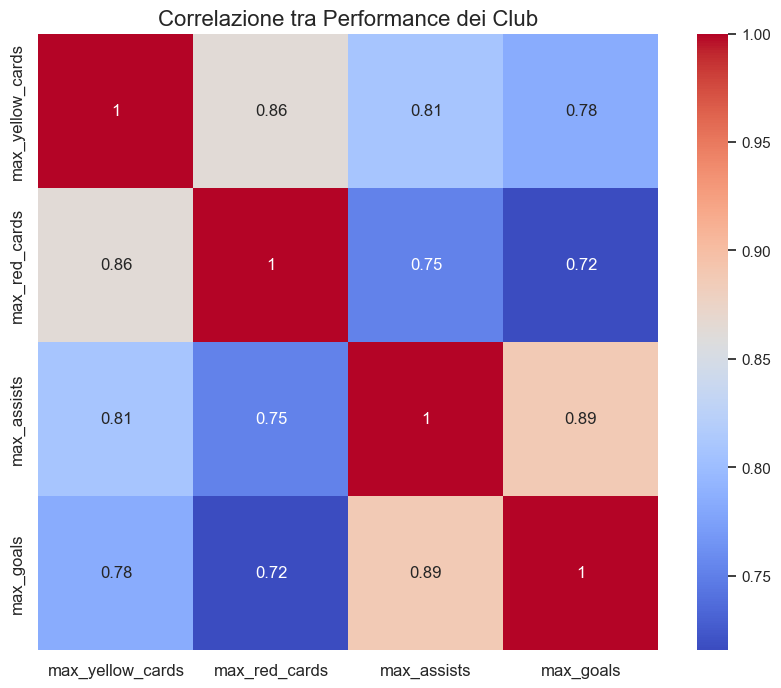

KeyError: 'name'

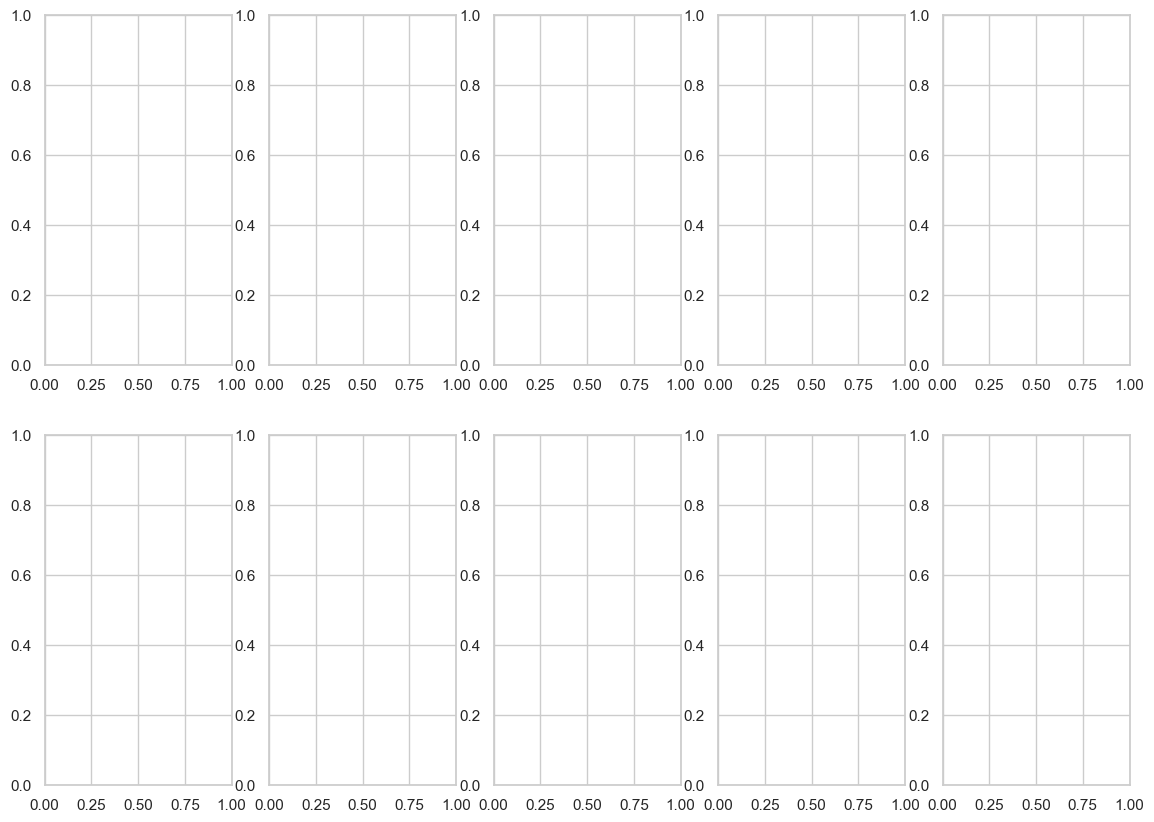

In [109]:

# Heatmap di correlazione
corr = result[['max_yellow_cards', 'max_red_cards', 'max_assists', 'max_goals']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlazione tra Performance dei Club', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# Grafici a barre
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
result = pd.merge(result, dataClubs[['club_id', 'name']], left_on='player_club_id', right_on='club_id', how='left')
result.sort_values('max_yellow_cards', ascending=False).head(10).plot(x='name', y='max_yellow_cards', kind='bar', ax=axes[0, 0], color='y')
result.sort_values('max_red_cards', ascending=False).head(10).plot(x='name', y='max_red_cards', kind='bar', ax=axes[0, 1], color='r')
result.sort_values('max_assists', ascending=False).head(10).plot(x='name', y='max_assists', kind='bar', ax=axes[1, 0], color='b')
result.sort_values('max_goals', ascending=False).head(10).plot(x='name', y='max_goals', kind='bar', ax=axes[1, 1], color='g')
plt.tight_layout()
plt.show()


# Scatter plot per goal vs assist
plt.figure(figsize=(8, 6))
sns.scatterplot(data=result, x='max_assists', y='max_goals', size='max_yellow_cards', hue='max_red_cards', palette='coolwarm', sizes=(20, 200))
plt.title('Relazione tra Goal e Assist con Cartellini come Parametro', fontsize=16)
plt.xlabel('Assist', fontsize=14)
plt.ylabel('Goal', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



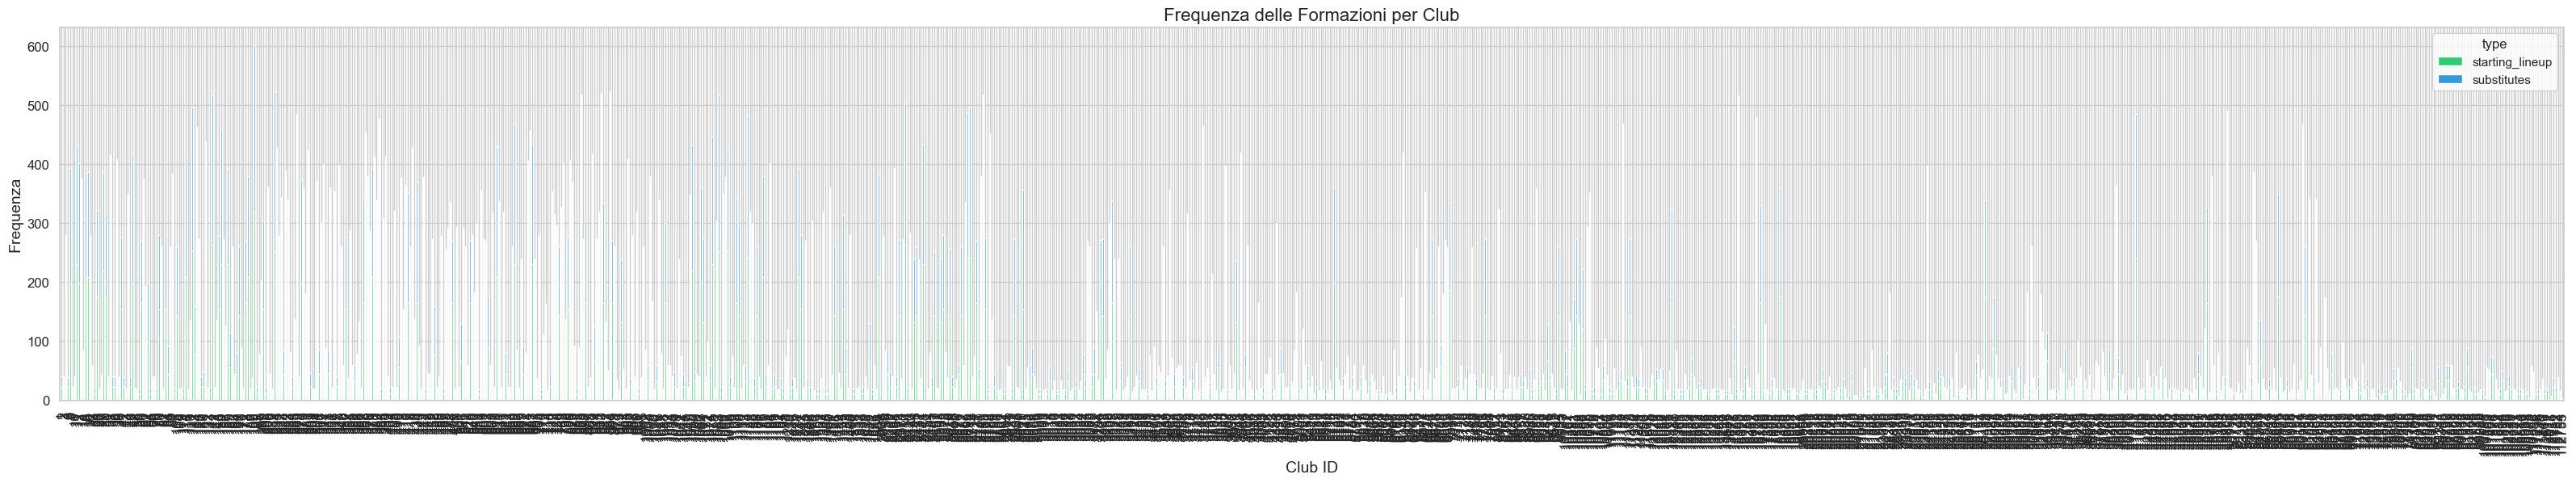

In [108]:
# Grafico a barre per le formazioni
formations = dataGamesLineups.groupby(['club_id', 'type']).size().unstack().fillna(0)
formations.plot(kind='bar', stacked=True, figsize=(40, 6))
plt.title('Frequenza delle Formazioni per Club', fontsize=16)
plt.xlabel('Club ID', fontsize=14)
plt.ylabel('Frequenza', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# Radar chart per le posizioni dei giocatori
# Potrebbe essere necessario elaborare ulteriormente i dati per ottenere le frequenze delle posizioni per ciascun club


/var/folders/9x/57__ff_j1wscnvbjdyy9gsrw0000gp/T/ipykernel_36187/493848029.py:11: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



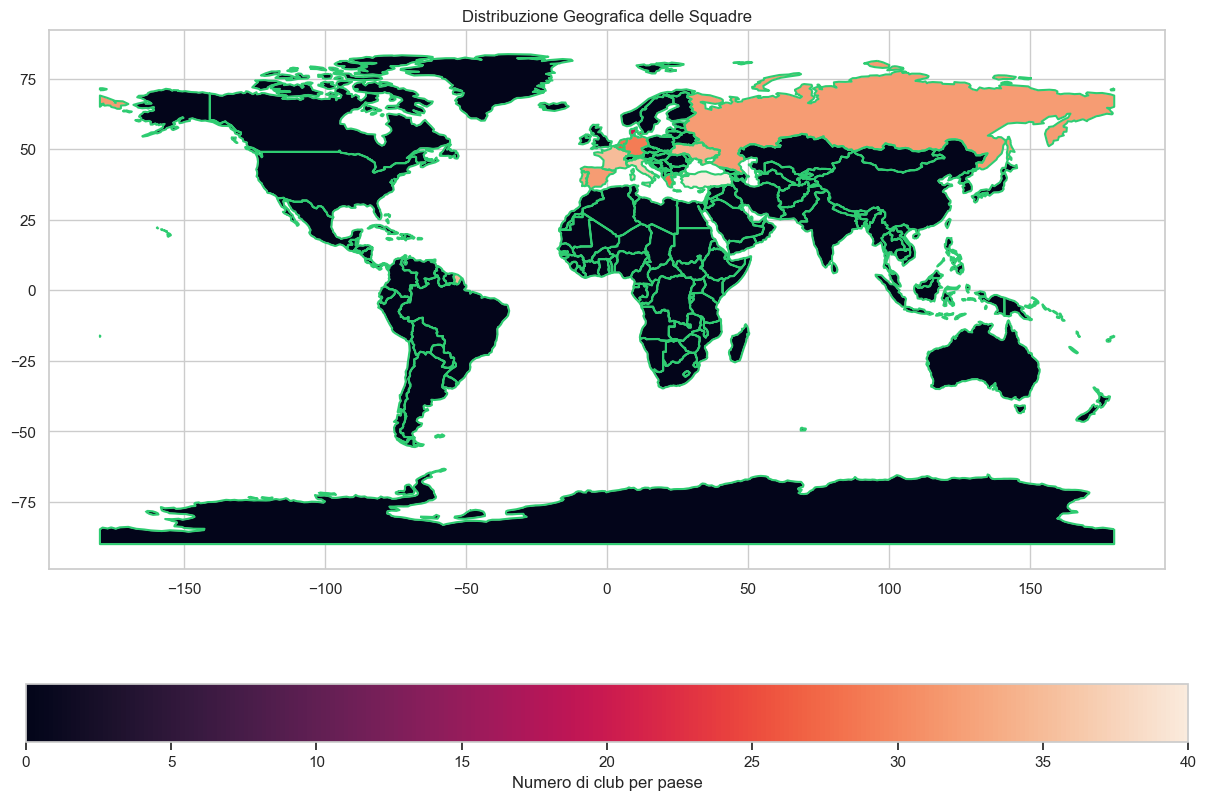

In [111]:

# Supponendo di avere i dataframe caricati come dataClubs e dataCompetitions

# Uniamo i dataframe sui rispettivi ID delle competizioni domestiche
merged_data = pd.merge(dataClubs, dataCompetitions, left_on='domestic_competition_id', right_on='competition_id', how='inner')

# Contiamo il numero di club per paese
country_club_counts = merged_data['country_name'].value_counts().reset_index()
country_club_counts.columns = ['country', 'number_of_clubs']

# Carichiamo un geodataframe con i confini dei paesi
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Uniamo i dati dei club con il geodataframe
world_clubs = world.merge(country_club_counts, how="left", left_on="name", right_on="country")

# Impostiamo i valori NaN a 0
world_clubs['number_of_clubs'] = world_clubs['number_of_clubs'].fillna(0)

# Creiamo la mappa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_clubs.boundary.plot(ax=ax)
world_clubs.plot(column='number_of_clubs', ax=ax, legend=True,
                 legend_kwds={'label': "Numero di club per paese",
                              'orientation': "horizontal"})
plt.title('Distribuzione Geografica delle Squadre')
plt.show()


In [ ]:
team_country_distribution = dataCompetitions['country_name'].value_counts()
plt.figure(figsize=(12, 6))
team_country_distribution.plot(kind='bar', color='royalblue')
plt.title('Distribuzione delle Squadre per Paese', fontsize=16)
plt.xlabel('Paese', fontsize=14)
plt.ylabel('Numero di Squadre', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# importante
Analisi del Valore di Mercato e delle Caratteristiche dei Club
Possiamo esaminare come le caratteristiche dei club come l'età media, la percentuale di giocatori stranieri e il valore di mercato totale sono correlate tra loro e come queste caratteristiche si distribuiscono in diverse leghe.

Grafici proposti:
Scatter plot con bubble size: Mostra la relazione tra l'età media e il valore di mercato totale dei club, usando la dimensione della bolla per rappresentare la dimensione della squadra o la percentuale di giocatori stranieri. 

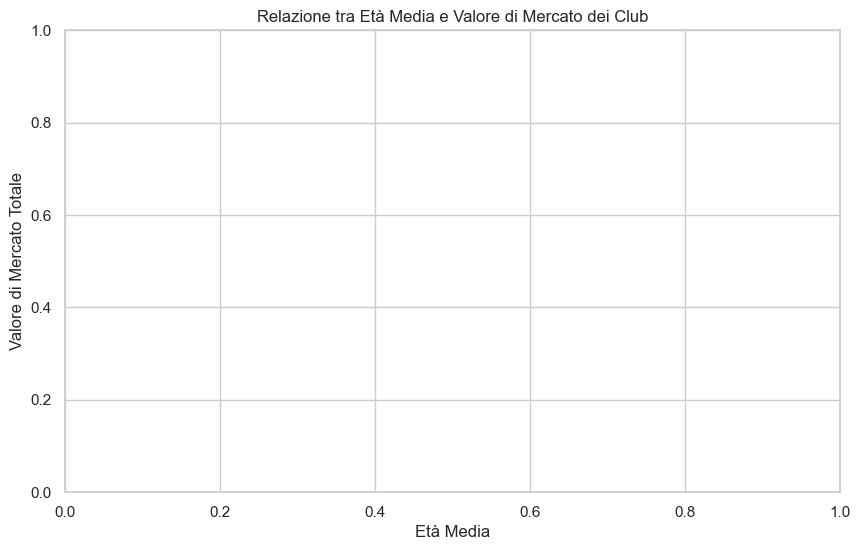

In [110]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataClubs, x='average_age', y='total_market_value', size='squad_size', hue='foreigners_percentage', sizes=(20, 200), alpha=0.5)
plt.title('Relazione tra Età Media e Valore di Mercato dei Club')
plt.xlabel('Età Media')
plt.ylabel('Valore di Mercato Totale')
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='domestic_competition_id', y='total_market_value')
plt.title('Distribuzione del Valore di Mercato per Lega')
plt.xlabel('Lega')
plt.ylabel('Valore di Mercato Totale')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#dataGamesEvents
dataGamesEvents

In [ ]:
# Grafico a barre per la frequenza degli eventi
event_counts = dataGamesEvents['type'].value_counts()
event_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Frequenza degli Eventi nelle Partite')
plt.xlabel('Tipo di Evento')
plt.ylabel('Frequenza')
plt.xticks(rotation=45)
plt.show()

# Line chart per l'andamento degli eventi nel tempo
# Richiede una manipolazione dei dati per aggregare gli eventi per minuto/partita


# Creazione di una nuova tabella contenente gli eventi dei giocatori durante i games---> cartellini, assist, sostituzioni,goal, minuti giocati

- DA FARE ANCHE SE VALUTABILE IN QUANTO BISOGNA COLLEGARLA AL TEMA PRINCIPALE SULLA STRATEGIA E VALUTAZIONE DEI TEAMS

---> valutazione del miglior giocatore in campo globale

---> per ogni club possibile valutazione del miglior giocatore 

---> comportamento PEGGIORE di un  giocatore attraverso la valutazione dei cartellini presi

---> comportamento MIGLIORE di un  giocatore attraverso la valutazione dei cartellini presi

---> miglior giocatore per la quantità di assist 


In [ ]:
# Seleziona solo le colonne di interesse
columns_to_select = ['player_id', 'card_type', 'minute', 'goal_type', 'assist_type', 'player_assist_id', 'description']
new_data_Players_performance = dataGamesEvents[columns_to_select]
new_data_Players_performance = pd.merge(new_data_Players_performance, dataPlayers, left_on='player_id', right_on='player_id', how='left')
new_data_Players_performance


# Crea colonne separate per i diversi tipi di eventi
# new_data['card_type'] = new_data['card_type'].apply(lambda x: x if pd.notna(x) else None)
# new_data['goal_type'] = new_data['goal_type'].apply(lambda x: x if pd.notna(x) else None)
# new_data['assist_type'] = new_data['assist_type'].apply(lambda x: x if pd.notna(x) else None)

# # Raggruppa i dati per player_id e aggrega le colonne usando 'first' per ottenere il primo valore non mancante
# new_data = new_data.groupby('player_id').agg({
#     'card_type': 'first',
#     'minute': 'first',
#     'goal_type': 'first',
#     'assist_type': 'first',
#     'player_assist_id': 'first',
#     'description': 'first'
# }).reset_index()

# Effettua il merge con la tabella dei giocatori

# Visualizza la nuova tabella


## tabella che elenca i giocatori che hanno fatto assist nei game

In [ ]:
dataGamesEvents

In [ ]:
columns_to_select = ['player_id', 'minute', 'goal_type', 'assist_type', 'player_assist_id']
assist_Players_performance = dataGamesEvents[columns_to_select]
assist_Players_performance = pd.merge(assist_Players_performance, dataPlayers, left_on='player_assist_id', right_on='player_id', how='left')
assist_Players_performance

# Calcola la distribuzione delle posizioni dei giocatori  del nostro dataset





In [ ]:

position_distribution = dataPlayers['position'].value_counts()

# Crea un grafico a barre
plt.figure(figsize=(10, 6))
position_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribuzione delle Posizioni dei Giocatori')
plt.xlabel('Posizione')
plt.ylabel('Numero di Giocatori')
plt.xticks(rotation=45)
plt.show()

# Calcola la distribuzione dei tipi di cartellini
- DA FARE 
--> possibile valutazione del numero di cartellini presi nelle diverse competizioni, in quale competizioni si prendono più cartellini---> può essere l'albitro con poca esperienza ad asseganarli senza criterio o il giocatore meno professionale?
 

In [ ]:
card_distribution = dataGamesEvents['card_type'].value_counts()

# Crea un grafico a barre
plt.figure(figsize=(10, 6))
card_distribution.plot(kind='bar', color='gold')
plt.title('Distribuzione dei Cartellini Gialli e Rossi')
plt.xlabel('Tipo di Cartellino')
plt.ylabel('Numero di Cartellini')
plt.xticks(rotation=45)
plt.show()


# Calcola la distribuzione delle nazionalità


In [ ]:
nationality_distribution = dataPlayers['country_of_citizenship'].value_counts()[:10]  # Visualizza le prime 10 nazionalità

# Crea un grafico a barre
plt.figure(figsize=(12, 6))
nationality_distribution.plot(kind='bar', color='mediumseagreen')
plt.title('Distribuzione delle Nazionalità dei Giocatori')
plt.xlabel('Nazionalità')
plt.ylabel('Numero di Giocatori')
plt.xticks(rotation=45)
plt.show()


# Calcola la distribuzione delle competizioni per paese


In [ ]:
team_country_distribution = dataCompetitions['country_name'].value_counts()

# Crea un grafico a barre
plt.figure(figsize=(12, 6))
team_country_distribution.plot(kind='bar', color='royalblue')
plt.title('Distribuzione delle Squadre per Paese')
plt.xlabel('Paese')
plt.ylabel('Numero di Squadre')
plt.xticks(rotation=45)
plt.show()


### creazione di un Grafico con la geolocalizzazione dei club nella mappa geografica 

#### NON FUNZIONANTE

- problema causato dall non indicizzazione dei country in latitudine e longitudine capire come risolvere questa cosa !!!!!!!

questo codice esegue il geocoding dei nomi dei paesi contenuti nella colonna 'country_name' del DataFrame mergedData e salva le coordinate geografiche corrispondenti nella nuova colonna 'location'. Queste coordinate possono poi essere utilizzate per rappresentare i club su una mappa geografica.


In [ ]:
# Effettua il join tra i due DataFrame
mergedData = pd.merge(dataClubs, dataCompetitions, left_on='domestic_competition_id', right_on='competition_id', how='left')

# Inizializzazione del geolocalizzatore
geolocator = Nominatim(user_agent="geoapiExercises")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)  # Aggiunge un ritardo tra le richieste

# Applica il geocoding per ottenere latitudine e longitudine
mergedData['location'] = mergedData['country_name'].apply(geocode)
mergedData['point'] = mergedData['location'].apply(lambda loc: tuple(loc.point) if loc else None)

# Estrai latitudine e longitudine in due colonne separate
mergedData[['latitude', 'longitude', 'altitude']] = pd.DataFrame(mergedData['point'].tolist(), index=mergedData.index)

# Creazione della mappa base
mappa = folium.Map(location=[0, 0], zoom_start=2)

# Aggiunta di un marker per ogni club nella mappa
for idx, row in mergedData.iterrows():
    if pd.notnull(row['latitude']) and pd.notnull(row['longitude']):
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=row['club_id'],  # o qualsiasi altra informazione che vuoi mostrare
        ).add_to(mappa)

# Visualizzazione della mappa
mappa

# Effettua il join tra i due DataFrame
clubs e competitions

In [ ]:

mergedDataClubsCompet = pd.merge(dataClubs, dataCompetitions, left_on='domestic_competition_id', right_on='competition_id', how='left')
mergedDataClubsCompet

# Assumendo che i dati necessari siano in dataGameEvents
# Analisi delle statistiche di gioco per club

In [ ]:
dataGamesEvents

In [ ]:

stats_by_club = dataGamesEvents.groupby('club_id').agg({
    'goals': 'sum',
    'assists': 'sum',
    # Aggiungi altre statistiche rilevanti qui
}).reset_index()



# Unisci con mergedData per ottenere i nomi dei club e i paesi


In [ ]:

club_stats = pd.merge(stats_by_club, mergedData, left_on='club_id', right_on='id', how='left')

# Prestazioni dei Club in Casa vs Trasferta
Potresti voler confrontare le prestazioni dei club quando giocano in casa vs quando giocano in trasferta:

In [ ]:
home_away_performance = dataGames.groupby(['club_id', 'is_home_game']).agg({
    'goals': 'sum',
    # Aggiungi altre statistiche rilevanti qui
}).reset_index()

# voglio trovare i club peggiori e i migliori e metterli in ordine
trovare il numero di goal che ogni club ha fatto per nella sua competizione domestica 
numero di games giocati in casa e numero di quelli fuori casa per ogni clubs 

In [ ]:
# total_goals_home = dataGames.groupby("home_club_id")["home_club_goals"].sum()
# total_goals_away = dataGames.groupby("away_club_id")["away_club_goals"].sum()
# total_goals_home
# total_goals_away
#dataGames
# Calcola il totale delle partite giocate da ciascuna squadra in casa
home_games = dataGames['home_club_id'].value_counts().reset_index()
home_games.columns = ['home_club_id', 'home_club_games']

# Calcola il totale delle partite giocate da ciascuna squadra fuori casa
away_games = dataGames['away_club_id'].value_counts().reset_index()
away_games.columns = ['away_club_id', 'away_club_games']
home_games

# Aggregazione delle sul club per valutare le Partite fatte in casa e fatte fuori casa 
---> valutazione delle prestazioni di una squadra se ha performato meglio giocando in casa o fuori casa 

---> vedere le differenze di gioco di un club 

---> vedere che tipi di formazione ha adottato e che risultato ha ottenuto (per quelle che ci sono)

---> statistiche di vincita e perdica che ha un manager---> valutazione del manager per numero di partite vinte/perse/pareggiate e fare una classifica 

--->   possibili analisi di CHAT GPT
*Analisi dei goal segnati a casa e fuori casa:* Puoi calcolare la media dei goal segnati a casa e fuori casa per ciascuna squadra. Successivamente, puoi creare un grafico a barre per confrontare i goal segnati in casa e fuori casa per le squadre.

*Analisi della posizione delle squadre in classifica:* Puoi calcolare la posizione media delle squadre in classifica quando giocano in casa e fuori casa. Quindi, crea un grafico a dispersione per visualizzare la relazione tra la posizione in classifica e i punti ottenuti in casa e fuori casa.

*Analisi dell'andamento delle partite nel tempo:* Puoi tracciare un grafico a linee che mostra l'andamento dei goal segnati in casa e fuori casa nel corso delle stagioni.

*Analisi dell'occupazione dello stadio:* Calcola la media dell'affluenza allo stadio per ciascuna partita e crea un grafico a barre per visualizzare l'occupazione media dello stadio nelle partite casalinghe e in trasferta.

*Analisi delle partite aggregate:* Puoi calcolare la media dei goal segnati nelle partite aggregate in casa e fuori casa e confrontarle con un grafico a barre.

*Analisi delle competizioni:* Crea un grafico a torta per mostrare la distribuzione delle partite per tipo di competizione (domestic league, domestic cup, ecc.).

*Analisi delle vittorie in casa e in trasferta:* Calcola il numero di partite vinte in casa e in trasferta per ciascuna squadra e crea un grafico a barre per confrontare le vittorie.

*Analisi delle differenze nei gol segnati e subiti:* Calcola la differenza tra i goal segnati e quelli subiti in casa e in trasferta per ciascuna squadra. Successivamente, crea un grafico a dispersione per visualizzare la relazione tra le differenze nei goal segnati e i punti ottenuti.

*Analisi delle partite più frequenti:* Identifica le partite più frequenti (le coppie di squadre che si sono affrontate più spesso) e crea un grafico a barre per mostrarle.*

*Analisi delle prestazioni degli allenatori: Puoi calcolare la media dei goal segnati e subiti sotto la gestione di ciascun allenatore e confrontare le prestazioni.*


In [114]:
home_away_performance = pd.merge(dataGames, dataGames, left_on='home_club_id', right_on='away_club_id', how='left')
#home_away_performance = pd.merge(home_away_performance, home_games, left_on='club_id', right_on='home_club_id', how='left')

In [115]:
home_away_performance 

,game_id_x,competition_id_x,season_x,round_x,date_x,home_club_id_x,away_club_id_x,home_club_goals_x,away_club_goals_x,home_club_position_x,away_club_position_x,home_club_manager_name_x,away_club_manager_name_x,stadium_x,attendance_x,referee_x,url_x,home_club_formation_x,away_club_formation_x,home_club_name_x,away_club_name_x,aggregate_x,competition_type_x,game_id_y,competition_id_y,season_y,round_y,date_y,home_club_id_y,away_club_id_y,home_club_goals_y,away_club_goals_y,home_club_position_y,away_club_position_y,home_club_manager_name_y,away_club_manager_name_y,stadium_y,attendance_y,referee_y,url_y,home_club_formation_y,away_club_formation_y,home_club_name_y,away_club_name_y,aggregate_y,competition_type_y
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,5.0,Stanislav Cherchesov,Unai Emery,Akhmat-Arena,21700.0,Vladislav Bezborodov,https://www.transfermarkt.co.uk/terek-grozny_s...,NaN,NaN,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league,2335226.0,RU1,2013.0,26. Matchday,2014-04-19,932.0,3725.0,2.0,1.0,2.0,12.0,Leonid Kuchuk,Rashid Rakhimov,RZD Arena,8625.0,Sergey Lapochkin,https://www.transfermarkt.co.uk/lokomotiv-mosc...,NaN,NaN,"Футбольный клуб ""Локомотив"" Москва",RFK Akhmat Grozny,2:1,domestic_league
1,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,5.0,Stanislav Cherchesov,Unai Emery,Akhmat-Arena,21700.0,Vladislav Bezborodov,https://www.transfermarkt.co.uk/terek-grozny_s...,NaN,NaN,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league,2489336.0,RU1,2014.0,6. Matchday,2014-08-29,11127.0,3725.0,0.0,1.0,15.0,4.0,Aleksandr Tarkhanov,Rashid Rakhimov,Yekaterinburg Arena,7840.0,Igor Fedotov,https://www.transfermarkt.co.uk/ural-yekaterin...,NaN,NaN,FK Ural Yekaterinburg,RFK Akhmat Grozny,0:1,domestic_league
2,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,5.0,Stanislav Cherchesov,Unai Emery,Akhmat-Arena,21700.0,Vladislav Bezborodov,https://www.transfermarkt.co.uk/terek-grozny_s...,NaN,NaN,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league,2559098.0,RU1,2014.0,26. Matchday,2015-05-02,1083.0,3725.0,0.0,1.0,11.0,8.0,Kurban Berdyev,Rashid Rakhimov,Olimp-2,12325.0,Aleksey Nikolaev,https://www.transfermarkt.co.uk/fk-rostov_tere...,NaN,NaN,FK Rostov,RFK Akhmat Grozny,0:1,domestic_league
3,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,5.0,Stanislav Cherchesov,Unai Emery,Akhmat-Arena,21700.0,Vladislav Bezborodov,https://www.transfermarkt.co.uk/terek-grozny_s...,NaN,NaN,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league,2629976.0,RU1,2015.0,12. Matchday,2015-10-18,2696.0,3725.0,0.0,2.0,9.0,6.0,Frank Vercauteren,Rashid Rakhimov,Metallurg,10800.0,Sergey Kulikov,https://www.transfermarkt.co.uk/krylya-sovetov...,NaN,NaN,PFK Krylya Sovetov Samara,RFK Akhmat Grozny,0:2,domestic_league
4,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,5.0,Stanislav Cherchesov,Unai Emery,Akhmat-Arena,21700.0,Vladislav Bezborodov,https://www.transfermarkt.co.uk/terek-grozny_s...,NaN,NaN,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league,2921868.0,RUP,2017.0,Fifth Round,2017-09-21,3714.0,3725.0,3.0,0.0,NaN,NaN,Dmitriy Alenichev,Oleg Kononov,Fussballhalle Futbol-Arena Enisey,3000.0,Stanislav Vasiljev,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,Enisey Krasnoyarsk,RFK Akhmat Grozny,3:0,domestic_cup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021347,4013659,FAC,2022,Fourth Round,2023-01-29,512,3684,3,1,NaN,NaN,Alex Neil,Steve Evans,bet365 Stadium,14392.0,David Webb,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,Stoke City,NaN,3:1,domestic_cup,2578029.0,GB1,2015.0,13. Matchday,2015-11-21,180.0,512.0,0.0,1.0,8.0,11.0,Ronald Koeman,Mark Hughes,St Mary's Stadium,30039.0,Lee Mason,https://www.transfermarkt.co.uk/southampton-fc...,NaN,NaN,Southampton FC,Stoke City,0:1,domestic_league
10021348,4013659,FAC,2022,Fourth Round,2023-01-29,512,

# Analisi dei goal segnati a casa e fuori casa


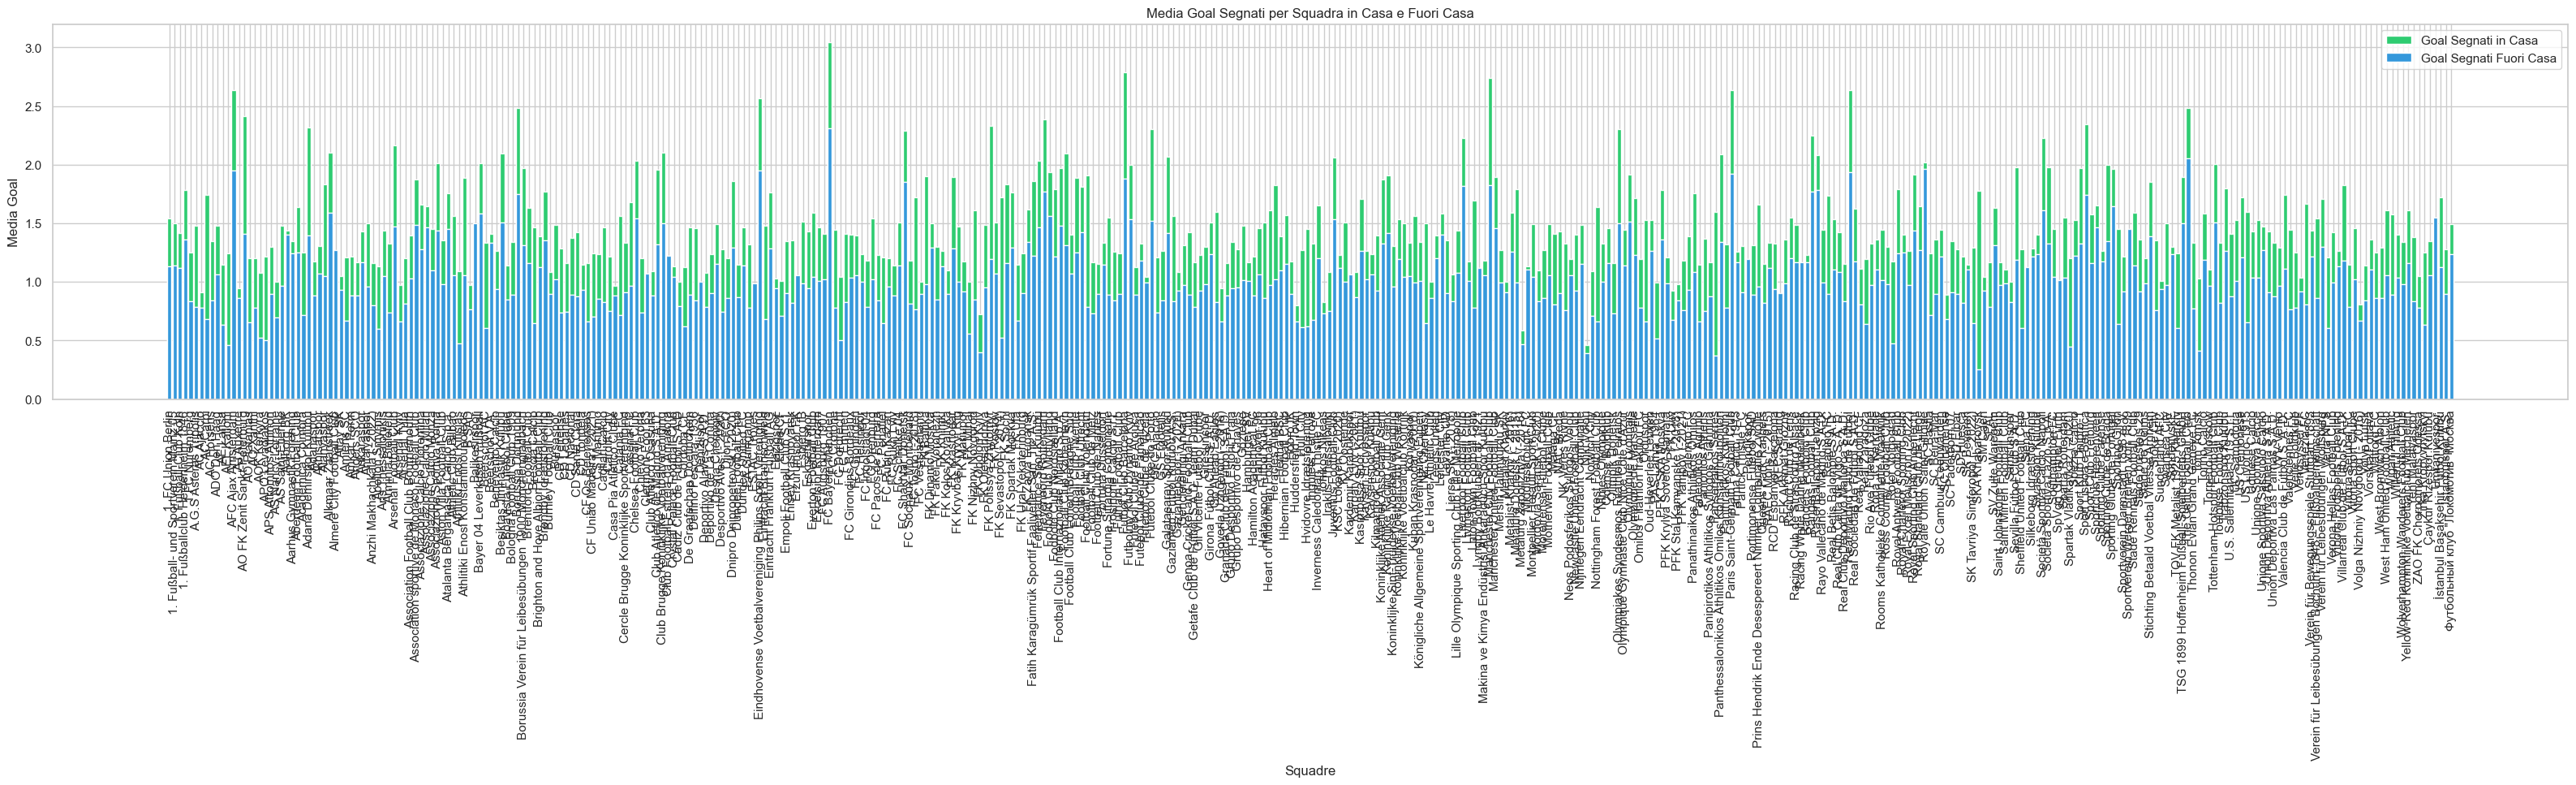

In [112]:
home_goals_mean = home_away_performance.groupby("home_club_name_x")["home_club_goals_x"].mean()
away_goals_mean = home_away_performance.groupby("away_club_name_x")["away_club_goals_x"].mean()
plt.figure(figsize=(40, 6))
plt.bar(home_goals_mean.index, home_goals_mean, label="Goal Segnati in Casa")
plt.bar(away_goals_mean.index, away_goals_mean, label="Goal Segnati Fuori Casa")
plt.xticks(rotation=90)
plt.xlabel("Squadre")
plt.ylabel("Media Goal")
plt.legend()
plt.title("Media Goal Segnati per Squadra in Casa e Fuori Casa")
plt.show()


# Analisi della posizione in classifica vs punti in casa e fuori casa


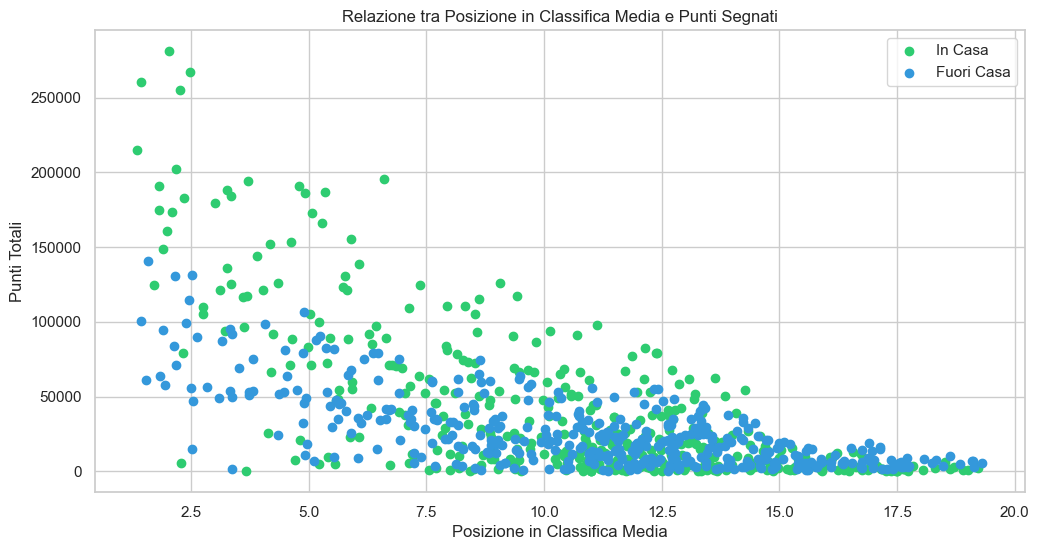

In [113]:
home_position_mean = home_away_performance.groupby("home_club_name_x")["home_club_position_x"].mean()
away_position_mean = home_away_performance.groupby("away_club_name_x")["away_club_position_x"].mean()
points_home = home_away_performance.groupby("home_club_name_x")["home_club_goals_x"].sum()
points_away = home_away_performance.groupby("away_club_name_x")["away_club_goals_x"].sum()

plt.figure(figsize=(12, 6))
plt.scatter(home_position_mean, points_home, label="In Casa")
plt.scatter(away_position_mean, points_away, label="Fuori Casa")
plt.xlabel("Posizione in Classifica Media")
plt.ylabel("Punti Totali")
plt.legend()
plt.title("Relazione tra Posizione in Classifica Media e Punti Segnati")
plt.show()

# Analisi dell'andamento dei goal segnati nel tempo

<Figure size 1200x600 with 0 Axes>

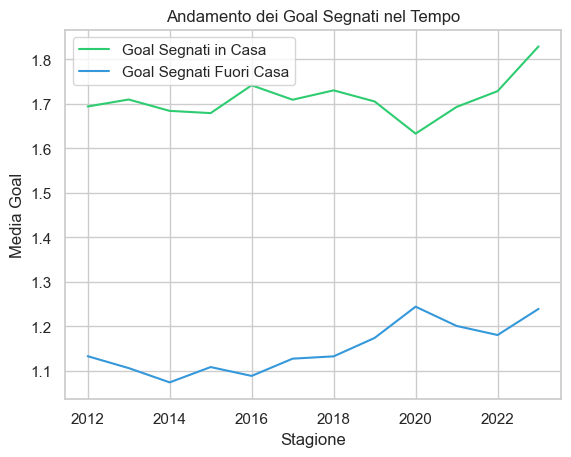

In [116]:

goals_over_time = home_away_performance.groupby("season_x")[["home_club_goals_x", "away_club_goals_x"]].mean()

plt.figure(figsize=(12, 6))
goals_over_time.plot(kind="line")
plt.xlabel("Stagione")
plt.ylabel("Media Goal")
plt.legend(["Goal Segnati in Casa", "Goal Segnati Fuori Casa"])
plt.title("Andamento dei Goal Segnati nel Tempo")
plt.show()

## Valutazione del miglior manager in base alle prestazioni della squadra in casa e fuori casa 

DA MIGLIORARE E RENDERE PIù CHIARO

In [119]:
# Calcola la media dei punti ottenuti per partita in casa e fuori casa
home_away_performance["points_per_match_home"] = home_away_performance["home_club_goals_x"] / home_away_performance["home_club_goals_x"].count()
home_away_performance["points_per_match_away"] = home_away_performance["away_club_goals_x"] / home_away_performance["away_club_goals_x"].count()

# Calcola il rapporto goal segnati e subiti in casa e fuori casa
home_away_performance["goal_ratio_home"] = home_away_performance["home_club_goals_x"] / home_away_performance["away_club_goals_x"].sum()
home_away_performance["goal_ratio_away"] = home_away_performance["away_club_goals_x"] / home_away_performance["home_club_goals_x"].sum()

# Calcola la posizione in classifica media in casa e fuori casa
home_away_performance["position_mean_home"] = home_away_performance.groupby("home_club_name_x")["home_club_position_x"].mean()
home_away_performance["position_mean_away"] = home_away_performance.groupby("away_club_name_x")["away_club_position_x"].mean()

# Calcola una valutazione dei manager
home_away_performance["manager_rating"] = (
    (home_away_performance["points_per_match_home"] + home_away_performance["points_per_match_away"]) +
    (home_away_performance["goal_ratio_home"] + home_away_performance["goal_ratio_away"]) +
    (1 / home_away_performance["position_mean_home"] + 1 / home_away_performance["position_mean_away"])
)

# Ordina i manager in base alla valutazione
manager_ratings = home_away_performance.groupby("home_club_manager_name_x")["manager_rating"].mean()
manager_ratings = manager_ratings.sort_values(ascending=False)

# Visualizza la classifica dei manager
#print(manager_ratings.head(10))  # Mostra i primi 10 manager con la valutazione più alta
manager_ratings

KeyboardInterrupt: 

TypeError: 'value' must be an instance of str or bytes, not a int

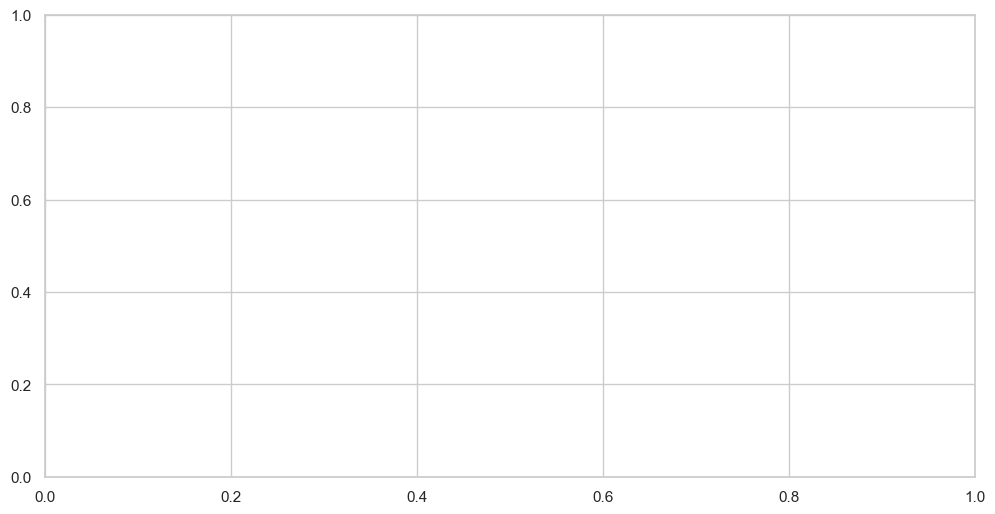

In [118]:
# Calcola il numero di partite vinte in casa per ogni manager
home_wins = home_away_performance[(home_away_performance['home_club_goals_x'] > home_away_performance['away_club_goals_y'])].groupby('home_club_manager_name_x').size().reset_index(name='home_wins')

# Calcola il numero di partite perse in casa per ogni manager
home_losses = home_away_performance[(home_away_performance['home_club_goals_x'] < home_away_performance['away_club_goals_y'])].groupby('home_club_manager_name_x').size().reset_index(name='home_losses')

# Calcola il numero di partite vinte fuori casa per ogni manager
away_wins = home_away_performance[(home_away_performance['away_club_goals_x'] > home_away_performance['home_club_goals_x'])].groupby('away_club_manager_name_x').size().reset_index(name='away_wins')

# Calcola il numero di partite perse fuori casa per ogni manager
away_losses = home_away_performance[(home_away_performance['away_club_goals_y'] < home_away_performance['home_club_goals_y'])].groupby('away_club_manager_name_x').size().reset_index(name='away_losses')

# Unisce i dati in un unico DataFrame
manager_stats = home_wins.merge(home_losses, on='home_club_manager_name_x', how='outer')
manager_stats = manager_stats.merge(away_wins, left_on='home_club_manager_name_x', right_on='away_club_manager_name_x', how='outer')
manager_stats = manager_stats.merge(away_losses, on='away_club_manager_name_x', how='outer')

# Riempie i valori mancanti con 0
manager_stats = manager_stats.fillna(0)

# Calcola il totale delle partite vinte e perse per ogni manager
manager_stats['total_wins'] = manager_stats['home_wins'] + manager_stats['away_wins']
manager_stats['total_losses'] = manager_stats['home_losses'] + manager_stats['away_losses']

# Crea il grafico a barre
plt.figure(figsize=(12, 6))
plt.bar(manager_stats['home_club_manager_name_x'], manager_stats['total_wins'], label='Partite Vinte', alpha=0.7)
plt.bar(manager_stats['home_club_manager_name_x'], manager_stats['total_losses'], label='Partite Perse', alpha=0.7, bottom=manager_stats['total_wins'])
plt.xlabel('Manager')
plt.ylabel('Numero di Partite')
plt.title('Partite Vinte e Perse per Manager (in Casa e Fuori Casa)')
plt.xticks(rotation=90)
plt.legend()
plt.show()